# Assignment 1

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import sympy as sp
import matplotlib.pyplot as plt

#%% Assignment 1
df = pd.DataFrame({1:[1/12,2/12,2/12,0], 2:[0,0,1/12,2/12], 3:[0,2/12,2/12,0]})
df = df.rename({0: 5, 1:6, 2: 7,3: 8})
print(df.to_string())

          1         2         3
5  0.083333  0.000000  0.000000
6  0.166667  0.000000  0.166667
7  0.166667  0.083333  0.166667
8  0.000000  0.166667  0.000000


In [2]:
#Task 1
fx = df.sum(0)
display("fx = ",fx)

fy = df.sum(1)
display("fy = ",fy)

'fx = '

1    0.416667
2    0.250000
3    0.333333
dtype: float64

'fy = '

5    0.083333
6    0.333333
7    0.416667
8    0.166667
dtype: float64

In [3]:
#Task 2
EX = np.array(fx).dot(np.array(fx.index))
print("E[X] = ", EX)
EY = np.array(fy).dot(np.array(fy.index))
print("E[Y] = ", EY)

EX2 = np.array(fx).dot(np.array(fx.index)**2)
print("E[X^2] = ", EX2)
EY2 = np.array(fy).dot(np.array(fy.index)**2)
print("E[Y^2] = ", EY2)

EXY = np.array(df.index).dot(np.array(df)).dot(np.array(df.columns))
print("E[XY] = ", EXY)

E[X] =  1.9166666666666665
E[Y] =  6.666666666666666
E[X^2] =  4.416666666666666
E[Y^2] =  45.16666666666666
E[XY] =  12.916666666666666


In [4]:
#Task 3
varX = EX2-EX**2
varY = EY2-EY**2
coVar = EXY - EX*EY
print(coVar)
corrCoef = coVar/np.sqrt(varX*varY)
print(corrCoef)

0.13888888888889106
0.189592623928696


In [5]:
#Task 4
print("They are not independet as the probability of X change if we know Y")

They are not independet as the probability of X change if we know Y


In [6]:
#Task 5
print(df.loc[6,:]/df.loc[6,:].sum())

1    0.5
2    0.0
3    0.5
Name: 6, dtype: float64


# Assignment 2

In [7]:
#Task 1
X = np.array([1,2,3,2,1])
Y = np.array([2,4 ,1])
print(np.correlate(X,Y,'full'))

[ 1  6 13 18 15  8  2]


In [8]:
#Task 2
X = np.array([4,3,1,2,6])
print(np.correlate(X,X,'full'))

[24 26 16 29 66 29 16 26 24]


# Assignment 3

In [9]:
#Task 1
display("The sum of all the probabilities must add up to 1")
k = sp.Symbol('k')
eq = sp.Eq(k+2/10+k+1/10+4/10+k,1)
k = float(sp.solve(eq,k)[0])
print("k = "+str(k))

'The sum of all the probabilities shall add up to 1'

k = 0.1


In [10]:
#Task 2
df = pd.DataFrame({4:[k, 2/10, 1/10, 0], 5:[0,0,0,k], 7:[0,k,4/10,0]})
df = df.rename({0: -3, 1:-1, 2:0,3:5})
print(df.to_string())
fx = df.sum(0)
display("fx = ",fx)

fy = df.sum(1)
display("fy = ",fy)

      4    5    7
-3  0.1  0.0  0.0
-1  0.2  0.0  0.1
 0  0.1  0.0  0.4
 5  0.0  0.1  0.0


'fx = '

4    0.4
5    0.1
7    0.5
dtype: float64

'fy = '

-3    0.1
-1    0.3
 0    0.5
 5    0.1
dtype: float64

In [11]:
#Task 3
EX = np.array(fx).dot(np.array(fx.index))
print("E[X] = ", EX)
EY = np.array(fy).dot(np.array(fy.index))
print("E[Y] = ", EY)

EX2 = np.array(fx).dot(np.array(fx.index)**2)
print("E[X^2] = ", EX2)
EY2 = np.array(fy).dot(np.array(fy.index)**2)
print("E[Y^2] = ", EY2)

EXY = np.array(df.index).dot(np.array(df)).dot(np.array(df.columns))
print("E[XY] = ", EXY)

print("\nThe same calculations is done manually on the picture below:")

E[X] =  5.6
E[Y] =  -0.10000000000000009
E[X^2] =  33.4
E[Y^2] =  3.7
E[XY] =  -0.20000000000000007

The same calculations is done manually on the picture below:


![Calculation by hand](https://i.imgur.com/OXeyeXo.png)

In [12]:
#Task 3 continues...
# Probability of y<0 means that Y should be -1 or -3
prob = sum(fy.loc[fy.index<0]) # 0.3+0.1
print("P(Y<0) = "+str(prob))

prob = np.sum(np.sum(df.loc[(df.index>0),df.columns==5])) # 1/10
print("P(X=5, Y>0) = "+str(prob))

prob = np.sum(np.sum((df.loc[(df.index<0),df.columns<6])))# 1/10+2/10+0+0
print("P(Y<6, Y<0) = "+str((prob)))

P(Y<0) = 0.4
P(X=5, Y>0) = 0.1
P(Y<6, Y<0) = 0.30000000000000004


In [13]:
#Task 4
VX = EX2 - EX**2
VY = EY2 - EY**2
print("V[X] = ", VX)
print("V[Y] = ", VY)

V[X] =  2.0400000000000027
V[Y] =  3.69


In [14]:
#Task 5
co_Var = EXY-EX*EY
corr_coeff = co_Var/np.sqrt(VX*VY)
print("covariance = ", co_Var)
print("Correlation coefficient = ", corr_coeff)

print("This number indicate that they are independet but not strongly correlated neither")

covariance =  0.36000000000000043
Correlation coefficient =  0.13121220505220868
This number indicate that they are independet but not strongly correlated neither


In [15]:
#Task 6
fxGivenYequal0 = df.loc[0,:]/sum(df.loc[0,:])
print(fxGivenYequal0)

4    0.2
5    0.0
7    0.8
Name: 0, dtype: float64


# Assignment 4

In [16]:
df = pd.DataFrame({4:[1, 2, 1], 5:[1,2,1], 6:[1,2,1]})/12
df = df.rename({0: 11, 1:12, 2:13})
print(df.to_string())
fx = df.sum(0)
display("fx = ",fx)

fy = df.sum(1)
display("fy = ",fy)

EX = np.array(fx).dot(np.array(fx.index))
EY = np.array(fy).dot(np.array(fy.index))

EX2 = np.array(fx).dot(np.array(fx.index)**2)
EY2 = np.array(fy).dot(np.array(fy.index)**2)

EXY = np.array(df.index).dot(np.array(df)).dot(np.array(df.columns))
VX = EX2 - EX**2
VY = EY2 - EY**2

co_Var = EXY-EX*EY
corr_coeff = co_Var/np.sqrt(VX*VY)
print("covariance = ", co_Var)
print("Correlation coefficient = ", corr_coeff)

print("As Correlation coefficient is zero X and Y are independet. ")

           4         5         6
11  0.083333  0.083333  0.083333
12  0.166667  0.166667  0.166667
13  0.083333  0.083333  0.083333


'fx = '

4    0.333333
5    0.333333
6    0.333333
dtype: float64

'fy = '

11    0.25
12    0.50
13    0.25
dtype: float64

covariance =  0.0
Correlation coefficient =  0.0
As Correlation coefficient is zero X and Y are independet. 


# Assignment 5

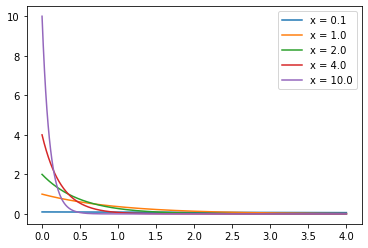

In [17]:
#Task 1
x = np.array([0.1,1,2,4,10])
y = np.linspace( 0, 4, 1001)
for x_ in x:
    f=x_*np.exp(-x_*y)
    plt.plot(y,f, label="x = "+str(x_))
    plt.legend()
plt.show()


In [18]:
#Task 2
y = sp.Symbol('y')
x = sp.Symbol('x')

def f(x,y):
    return x*sp.exp(-x*y)

display(sp.integrate(f(2,y),(y,0,2)))
#or
print(float(sp.integrate(f(2,y),(y,0,2))))

1 - exp(-4)

0.9816843611112658


In [19]:
#Task 3
print(sp.integrate(f(2,y)*y,(y,0,sp.oo)))

1/2
